In [ ]:
import cv2 

img = cv2.imread('WC25_LLEDGE2.tif',0) 
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color
cv2.imshow("pic",img)

print(img.shape)

cv2.waitKey(0)
cv2.destroyAllWindows() 

(942, 1716)


In [ ]:
pwd


In [ ]:
cd Python_project


In [ ]:
#16 - Understanding digital images for Python processing
#https://www.youtube.com/watch?v=Ijc-9L2iXEc&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW
#6/24/2025-6/25/2024

In [2]:
import cv2 
from skimage.filters import sobel


img = cv2.imread("WC25_LLEDGE2.tif",0) 
img2= sobel(img)
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color
cv2.imshow("abc",img)
cv2.imshow("edge",img2)

## in imshow(_name_,img) the _name_ is the name of the windows that pops out
print(img.shape)

cv2.waitKey(0)
cv2.destroyAllWindows() 

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


(942, 1716)


In [ ]:
from skimage import io 

my_image = io.imread("WC25_LLEDGE2.tif"),
#that reads it from top to bottom in terms of code
print(my_image) 
print(my_image.min(), my_image.max())

In [ ]:
from skimage import io 
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float

my_image = io.imread("WC25_LLEDGE2.tif"),
#that reads it from top to bottom in terms of code
print(my_image) 
# print(my_image.min(), my_image.max())

In [ ]:
from skimage import io 
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float

my_image = io.imread("WC25_LLEDGE2.tif"),
#that reads it from top to bottom in terms of code
print(my_image) 
# print(my_image.min(), my_image.max())

my_float_image = img_as_float(my_image)
print(my_float_image.min(), my_float_image.max())


# the first profile is the top left corner of the image
random_image = np.random.random([500,500])
plt.imshow(random_image)
#this is an unsigned integer that shows the values between 0 and 1
print(random_image.min(),random_image.max())


# dtypes...
# uint8 - 0 to 225
# uint16 = 0 to 65536
# uint 32 = 0 to ((2**32) -1)
# float = -1 to 1 or 0 to 1 
# int8 = -128 to 127
# int16 = -32768 to 32767
# int32 = -2**31 to 2**31 -1 

# Functinos that convert images to desired dtype and properly rescale their values 
# img_as_float - convert to 64-bit floating point
# img_as_ubyte - convert tt 8-bit uint. 
# img_as_uint - convert to 16-bit uint. 
# img_as_int - Convert to 16-bit int. 
print(random_image)
dark_image = random_image*0.5
print(dark_image)
print(dark_image.max())

# above is show how you can change the data 

In [ ]:

my_float_image = img_as_float(my_image)
print(my_float_image.min(), my_float_image.max())


In [ ]:

# the first profile is the top left corner of the image
random_image = np.random.random([500,500])
plt.imshow(random_image)
#this is an unsigned integer that shows the values between 0 and 1
print(random_image.min(),random_image.max())


In [ ]:
pip install scikit-image numpy matplotlib


In [ ]:
from skimage import io 
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float
# my_float_image = img_as_float(my_image)

my_image = io.imread("WC25_LLEDGE2.tif")
#that reads it from top to bottom in terms of code
print(my_image.min(), my_image.max()) 

my_image[10:200, 10:200, :] = [255, 200, 150]
plt.imshow(my_image)
# print(my_image)
# print(my_image.max())

# what is supposed to happen here is that a box would appear on the upper left corner of the image

In [ ]:
pip install scikit-image numpy matplotlib


In [ ]:
pwd

In [ ]:
#35 - Cell Nuclei analysis in Python using watershed segmentation
#https://www.youtube.com/watch?v=AsTvGxuiqKs
# https://github.com/bnsreenu/python_for_microscopists/blob/master/035-Cell%20Nuclei%20analysis%20using%20watershed.py
# 6/25/2024 - 6/26/2024

In [ ]:
# #!/usr/bin/env python
# __author__ = "Sreenivas Bhattiprolu"
# __license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# # https://www.youtube.com/watch?v=AsTvGxuiqKs

# """
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

# This code performs cell counting and size distribution analysis and dumps results into a csv file.
# It uses watershed segmentationfor better segmentation.
# Similar to grain analysis except here we segment cells. 
# """

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img = cv2.imread(r"C:\Users\cheukjy\osteosarcoma.tiff")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
#Check the total regions found before and after applying this. 

#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that we can use erode. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us. 
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)


#Let us threshold the dist transform by starting at 1/2 its max value.
#print(dist_transform.max()) gives about 21.9
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
ret3, markers = cv2.connectedComponents(sure_fg)

#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

#Now we are ready for watershed filling. 
markers = cv2.watershed(img,markers)
#The boundary region will be marked -1
#https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1

#Let us color boundaries in yellow. 
img[markers == -1] = [0,255,255]  

img2 = color.label2rgb(markers, bg_label=0)

#cv2.imshow('Overlay on original image', img)
#cv2.imshow('Colored Grains', img2)
#cv2.waitKey(0)

#Now, time to extract properties of detected cells
# regionprops function in skimage measure module calculates useful parameters for each object.
regions = measure.regionprops(markers, intensity_image=cells)

#Can print various parameters for all objects
for prop in regions:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

#Best way is to output all properties to a csv file
#Let us pick which ones we want to export. 

propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    
    

output_file = open('cell_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

for region_props in regions:
    #output cluster properties to the excel file
    output_file.write(str(region_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = region_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = region_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = region_props[prop]*pixels_to_um
        else: 
            to_print = region_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')

In [ ]:
###Cell nuclei analysis in python using watershed segmentation 

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img1= cv2.imread(r"C:\Users\cheukjy\osteosarcoma.tiff")
img=img1[:,:,0]

cv2.imshow("Blue image",img)
#imshow("name of tab opening", file_that_will_be_opened)

cv2.waitKey(0)

pixels_to_um = 0,454 #1 pixel = 500 nm (got this from the metadata of the original image)

#doing this only shows the blue in the image 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img1 = cv2.imread(r"C:\Users\cheukjy\osteosarcoma.tiff")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
img=img1[:, :, 0]#Blue channel. Image equivalent to grey image.

pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
#Check the total regions found before and after applying this. 


#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that we can use erode. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us.
# - in other words, you're looking at the background. and seeing if the pixels 
#are too far awawy 
sure_bg = cv2.dilate(opening,kernel,iterations=2)
cv2.imshow("Sure Background", sure_bg)
cv2.waitKey(0)

# the result of this are larger pixelated dots that look different 
# now all the black area we know is just backgroudn... 
# the white cells are now just cells

In [ ]:
#### this is the background - definite foregroudn###

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img1 = cv2.imread(r"C:\Users\cheukjy\osteosarcoma.tiff")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
img=img1[:, :, 0]#Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
#Check the total regions found before and after applying this. 


#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that we can use erode. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us.
# - in other words, you're looking at the background. and seeing if the pixels 
#are too far awawy 
sure_bg = cv2.dilate(opening,kernel,iterations=2)

# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
## - what is the distance between each black area?
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

#Let us threshold the dist transform by starting at 1/2 its max value.
#print(dist_transform.max()) gives about 21.9
# Distance transform is when you are looking at how finely tuned you want to
# filter only showing the white spaces on the image. The larger the number you put, the less white spots you see
# this is helpful to only see cells 
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

cv2.imshow("sure foreground image", sure_fg)
cv2.waitKey(0)

# saw a problem with the tiny cells that seem to overlap 

In [ ]:
### This is now about the markers and labels in the regions inside
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img1 = cv2.imread(r"C:\Users\cheukjy\osteosarcoma.tiff")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
img=img1[:, :, 0]#Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
#Check the total regions found before and after applying this. 

#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that we can use erode. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us.
# - in other words, you're looking at the background. and seeing if the pixels 
#are too far awawy 
sure_bg = cv2.dilate(opening,kernel,iterations=2)

# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
## - what is the distance between each black area?
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

#Let us threshold the dist transform by starting at 1/2 its max value.
#print(dist_transform.max()) gives about 21.9
# Distance transform is when you are looking at how finely tuned you want to
# filter only showing the white spaces on the image. The larger the number you put, the less white spots you see
# this is helpful to only see cells 
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
ret3, markers = cv2.connectedComponents(sure_fg)

#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

#Now we are ready for watershed filling. 
markers = cv2.watershed(img1,markers)
#The boundary region will be marked -1
#https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1

#Let us color boundaries in yellow. 
img1[markers == -1] = [0,255,255]  

img2 = color.label2rgb(markers, bg_label=0)

cv2.imshow('Overlay on original image', img1)
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)

#Now, time to extract properties of detected cells
# regionprops function in skimage measure module calculates useful parameters for each object.
regions = measure.regionprops(markers, intensity_image=img1)

#Can print various parameters for all objects
for prop in regions:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

#Best way is to output all properties to a csv file
#Let us pick which ones we want to export. 

propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    
    

output_file = open('cell_measurements.csv', 'w')
output_file.write('Cell #,' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

# for region_props in regions:
#     #output cluster properties to the excel file
#     output_file.write(str(region_props['Label']))
#     for i,prop in enumerate(propList):
#         if(prop == 'Area'): 
#             to_print = region_props[prop]*pixels_to_um**2   #Convert pixel square to um square
#         elif(prop == 'orientation'): 
#             to_print = region_props[prop]*57.2958  #Convert to degrees from radians
#         elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
#             to_print = region_props[prop]*pixels_to_um
#         else: 
#             to_print = region_props[prop]     #Reamining props, basically the ones with Intensity in its name
#         output_file.write(',' + str(to_print))
#     output_file.write('\n')


In [ ]:
#https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html
#https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html

In [ ]:
pwd

In [ ]:
#266 - Openslide library for whole slide images
#https://www.youtube.com/watch?v=QntLBvUZR5c
# https://github.com/bnsreenu/python_for_microscopists/tree/master/266_openslide_for_whole_slide_images
#6/27/2024

In [4]:
#266 - Openslide library for whole slide images

import sys
for p in sys.path:
    print(p)

C:\Users\cheukjy
C:\ProgramData\anaconda3\python311.zip
C:\ProgramData\anaconda3\DLLs
C:\ProgramData\anaconda3\Lib
C:\ProgramData\anaconda3

C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages
C:\ProgramData\anaconda3\Lib\site-packages
C:\ProgramData\anaconda3\Lib\site-packages\win32
C:\ProgramData\anaconda3\Lib\site-packages\win32\lib
C:\ProgramData\anaconda3\Lib\site-packages\Pythonwin


In [6]:
from __future__ import division

# import os 
# os.environ['PATH'] 
OPENSLIDE_PATH = r"C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages\openslide\openslide-bin-4.0.0.3-windows-x64\bin"
# https://openslide.org/api/python/#installing 
import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

<_PropertyMap {'aperio.AppMag': '20', 'aperio.Date': '08/22/18', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '1015382', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '1015382', 'aperio.Left': '12.486486', 'aperio.LineAreaXOffset': '-0.000018', 'aperio.LineAreaYOffset': '-0.012135', 'aperio.LineCameraSkew': '0.000425', 'aperio.MPP': '0.4972', 'aperio.OriginalHeight': '80808', 'aperio.OriginalWidth': '89280', 'aperio.Parmset': '2x3 Support', 'aperio.ScanScope ID': 'SS5486', 'aperio.SessonMode': 'NR', 'aperio.StripeWidth': '992', 'aperio.Time': '09:20:45', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Top': '47.058392', 'aperio.User': '11c2f5f1-03d8-414a-bb47-bd06f111f8ed', 'openslide.associated.macro.height': '1246', 'openslide.associated.macro.width': '1600', 'openslide.associated.thumbnail.height': '768', 'openslide.associated.thumbnail.width': '815', 'openslide.comment': 'Ape

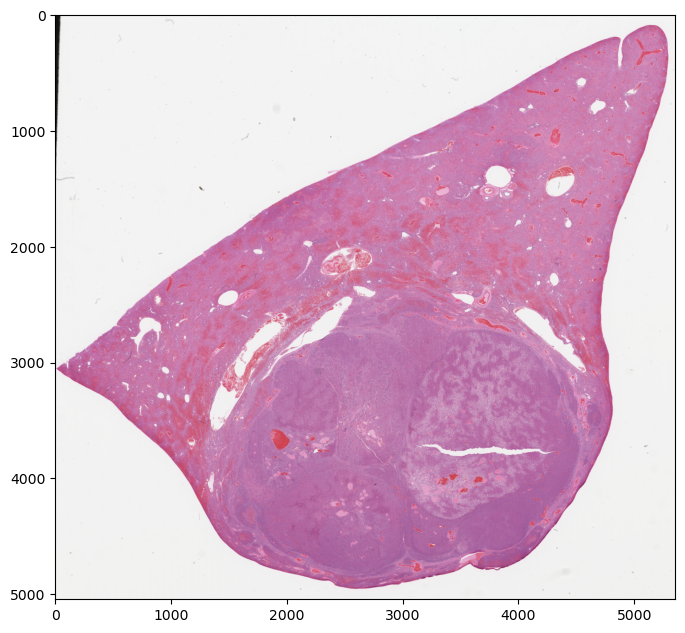

In [8]:
###### how to import your .svs image into the python and then make sure you can scale the image to its proper proportions #####

from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#Load the slide file (svs) into an object.

slide = open_slide("WC25_LLEDGE2.svs")

slide_props = slide.properties
print(slide_props)

print("Vondor is:", slide_props['openslide.vendor'])
print("Pixel size of X is um is:", slide_props['openslide.mpp-x'])
print('pixel size of Y is um is:', slide_props['openslide.mpp-y'])

#Objective used to capture the image
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
print("The objective power is: ", objective)

# get slide dimensions for the level 0 - max resolution level
slide_dims = slide.dimensions
print(slide_dims)

#Get a thimbnail of the image and visualize 
slide_thumb_600 = slide.get_thumbnail(size=(600,600))
slide_thumb_600.show()

slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize =(8,8))
plt.imshow(slide_thumb_600_np)

#Get slide dims at each Level. Remember that whole slide images store iformation
# as pytamids at various levels
dims = slide.level_dimensions

num_levels = len(dims)
print("number of levels in this image are:", num_levels)
print("Dimensions of various levels in this image are:", dims)

#by how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("each Level is downsampled by an amount of:", factors)

#copy an image from a level
level3_dim =dims[2]
# give pixel coordinates (top left pixel in the original large image)
# also give the level number (for level 3 we are providing a value of 2) 
# size of your output image 
#remember that the output would be a RGBA image (not,RGB) 
level3_img = slide.read_region((0,0),2,level3_dim) #Pillow object, mode = RGBA
# the levels show the type of resolution you can do. Extract a region from your slide... 
# the image is in your local hard drive  
# level 2 is 2k by 2.4 k 
# above in the read_region(), its saying to extract an image from the top left corner, that is by 2k by 2.4k resolution, and its height and witdth is 
# defined by level3_dim. 

# level3_dim: This argument should be a tuple representing the dimensions of the desired region at level 3. It likely looks like (width, height).

#Convert the image to RGB
level3_img_RGB = level3_img.convert('RGB')
level3_img_RGB.show()

#Convert the image into numpy arrat for processing 
level3_img_np = np.array(level3_img_RGB)
plt.imshow(level3_img_np)
# here, you just increased the quality of the image
#in np.array the scale will change.



# convert the image into numpy array for processing 
level3_img_RGB = level3_img.convert('RGB')
plt.imshow(level3_img_np)

#Return the best level for displaying the given downsample 
SCALE_FACTOR = 32
# what does the scale factor mean? 
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)
# the get_best_level_for_downsample, you just change the scale factor to what the computer thinks the best level is. 
#Here it returns the best level to be 2 (third level)
#If you change the scale factor to 2, it will suggest the best level to be 0 (our 1st level)

In [ ]:
####### generating tiles for deep learning #######

from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#Load the slide file (svs) into an object.

slide = open_slide("WC25_LLEDGE2.svs")

slide_props = slide.properties
print(slide_props)

print("Vondor is:", slide_props['openslide.vendor'])
print("Pixel size of X is um is:", slide_props['openslide.mpp-x'])
print('pixel size of Y is um is:', slide_props['openslide.mpp-y'])

#Objective used to capture the image
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
print("The objective power is: ", objective)

# get slide dimensions for the level 0 - max resolution level
slide_dims = slide.dimensions
print(slide_dims)

#Get a thimbnail of the image and visualize 
slide_thumb_600 = slide.get_thumbnail(size=(600,600))
slide_thumb_600.show()

slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize =(8,8))
plt.imshow(slide_thumb_600_np)

#Get slide dims at each Level. Remember that whole slide images store iformation
# as pytamids at various levels
dims = slide.level_dimensions

num_levels = len(dims)
print("number of levels in this image are:", num_levels)
print("Dimensions of various levels in this image are:", dims)

#by how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("each Level is downsampled by an amount of:", factors)

#copy an image from a level
level3_dim =dims[2]
# give pixel coordinates (top left pixel in the original large image)
# also give the level number (for level 3 we are providing a value of 2) 
# size of your output image 
#remember that the output would be a RGBA image (not,RGB) 
level3_img = slide.read_region((0,0),2,level3_dim) #Pillow object, mode = RGBA
# the levels show the type of resolution you can do. Extract a region from your slide... 
# the image is in your local hard drive  
# level 2 is 2k by 2.4 k 
# above in the read_region(), its saying to extract an image from the top left corner, that is by 2k by 2.4k resolution, and its height and witdth is 
# defined by level3_dim. 

# level3_dim: This argument should be a tuple representing the dimensions of the desired region at level 3. It likely looks like (width, height).

#Convert the image to RGB
level3_img_RGB = level3_img.convert('RGB')
level3_img_RGB.show()

#Convert the image into numpy arrat for processing 
level3_img_np = np.array(level3_img_RGB)
plt.imshow(level3_img_np)
# here, you just increased the quality of the image
#in np.array the scale will change.

# convert the image into numpy array for processing 
level3_img_RGB = level3_img.convert('RGB')
plt.imshow(level3_img_np)

#Return the best level for displaying the given downsample 
SCALE_FACTOR = 32
# what does the scale factor mean? 
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)
# the get_best_level_for_downsample, you just change the scale factor to what the computer thinks the best level is. 
#Here it returns the best level to be 2 (third level)
#If you change the scale factor to 2, it will suggest the best level to be 0 (our 1st level)

#########################################################
#Generating tiles for deep learning training or other processing purposes
#We can use read_region function and slide over the large image to extract tiles
#but an easier approach would be to use DeepZoom based generator.
# https://openslide.org/api/python/

from openslide.deepzoom import DeepZoomGenerator

#Generate object for tiles using the DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
#Here, we have divided our svs into tiles of size 256 with no overlap. 
# THe documentation is to have different tiles. 

print("The number of levels in the Tiles objects are: ", tiles.level_count)
print("The dimensions of data in each level are: ", tiles.level_dimensions)

# total number of tiles in the tiles object
print("total number of tiles =: ", tiles.tile_count)

#How many tiles at one specific level?
level_num = 11
print("Tiles shape at level ", level_num, " is: ", tiles.level_tiles[level_num])
print("This means there are ", tiles.level_tiles[level_num][0]*tiles.level_tiles[level_num][1], " total tiles in this level")

print(tiles.level_tiles[level_num])

#Dimensions of the tile (tile size) for a specific tile from a specific layer
tile_dims = tiles.get_tile_dimensions(11, (5,4)) #Provide deep zoom level and address (column, row)
# You put the tile shape there and you make sure subtract one from the total tile count 
# because you start from zero. ex. if you have 4,5 tile dimensions, you will put in 3,4

# #Tile count at the highest resolution level (level 16 in our tiles)
tile_count_in_large_image = tiles.level_tiles[16] #126 x 151 (32001/256 = 126 with no overlap pixels)
# 

#Check tile size for some random tile
tile_dims = tiles.get_tile_dimensions(16, (120,140))


#Last tiles may not have full 256x256 dimensions as our large image is not exactly divisible by 256
tile_dims = tiles.get_tile_dimensions(16, (125,150))
# this is typically one pixel by 74 pixels, so they are the ones at the edge. 

single_tile = tiles.get_tile(16, (62,70)) #provide deep zoom level and address (column, row)
single_tile_RGB = single_tile.convert('RGB')
single_tile_RGB.show()
# After doing this, the picture is a bit blurry when you zoom in, but you do focus on a 
#small part of the cell
# will show tile in 256 x 256 resolution

###### what if you want to learn deep learning and save the file on your local drive
###### Saving each tile to local directory

cols, rows = tiles.level_tiles[16]

import os
tile_dir = "openslide_test_images_06.27.2024"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        # you iterate through each column and then you see what you can do.
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(16, (col, row))
        # extract tile from specific location 
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        plt.imsave(tile_name + ".tif", temp_tile_np)
        # in the line of code directly above, the tutorial says to put it in a .png file, but remember to convert it into a .tiff file because you may need to 


In [ ]:
#267 - Processing whole slide images (as tiles)
# https://www.youtube.com/watch?v=tNfcvgPKgyU 
# https://github.com/bnsreenu/python_for_microscopists/tree/master/267_processing_whole_slide_images# 6/28/2024
# 6/28/2024

#122 - Normalizing H&E images and digitally separating Hematoxylin and Eosin components
#https://www.youtube.com/watch?v=yUrwEYgZUsA 


In [ ]:
# Loop through all files in the directory
for filename in os.listdir(png_folder):
  # Check if file is a PNG
  if filename.endswith(".png"):
    # Construct full path for PNG file
    png_path = os.path.join(png_folder, filename)
    
    # Generate output TIFF filename (optional: modify for specific naming)
    tiff_filename = os.path.splitext(filename)[0] + ".tiff"  # Remove extension and add .tiff
    tiff_path = os.path.join(png_folder, tiff_filename)

    # Open the PNG image
    image = Image.open(png_path)

    # Save the image as TIFF
    image.save(tiff_path)

    print(f"Converted {png_path} to {tiff_path}")

In [ ]:
import sys
for p in sys.path:
    print(p)

In [ ]:
from __future__ import division

# import os 
# os.environ['PATH'] 
OPENSLIDE_PATH = r"C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages\openslide\openslide-bin-4.0.0.3-windows-x64\bin"
# https://openslide.org/api/python/#installing 
import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

In [ ]:
from openslide import open_slide 
from PIL import Image
import numpy as np 
from matplotlib import pyplot as plt 
import tifffile as tiff


In [ ]:
#how to install pyvips

In [ ]:
# import os
# vipsbin = r'c:\vips-dev-8.13\bin'
# add_dll_dir = getattr(os, 'add_dll_directory', None)
# if callable(add_dll_dir):
#     add_dll_dir(vipsbin)
# else:
#     os.environ['PATH'] = os.pathsep.join((vipsbin, os.environ['PATH']))

In [ ]:
# import os
# vipsbin = r'C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages\pyvips\vips-dev-arm32-web-8.15.2-static\vips-dev-8.15\bin'
# add_dll_dir = getattr(os, 'add_dll_directory', None)
# if callable(add_dll_dir):
#     add_dll_dir(vipsbin)
# else:
#     os.environ['PATH'] = os.pathsep.join((vipsbin, os.environ['PATH']))

# C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages\pyvips\vips-dev-arm32-web-8.15.2-static\vips-dev-8.15\bin

In [ ]:
# would use it to install and make an image pyramid said in the importimg libraries chapter in the video
# import pyvips

In [ ]:
# https://youtu.be/tNfcvgPKgyU

# Original video on H&E topic: https://youtu.be/yUrwEYgZUsA
# """
# This code normalizes staining appearance of H&E stained images.
# It also separates the hematoxylin and eosing stains in to different images. 

# Workflow based on the following papers:
# A method for normalizing histology slides for quantitative analysis. 
# M. Macenko et al., ISBI 2009
#     http://wwwx.cs.unc.edu/~mn/sites/default/files/macenko2009.pdf

# Efficient nucleus detector in histopathology images. J.P. Vink et al., J Microscopy, 2013

# Original MATLAB code:
#     https://github.com/mitkovetta/staining-normalization/blob/master/normalizeStaining.m
 
# Other useful references:
#     https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5226799/
#     https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0169875

# PROPOSED WORKFLOW:  
    
# Input: RGB image
# Step 1: Convert RGB to OD (optical density)
# Step 2: Remove data with OD intensity less than β
# Step 3: Calculate  singular value decomposition (SVD) on the OD tuples
# Step 4: Create plane from the SVD directions corresponding to the
# two largest singular values
# Step 5: Project data onto the plane, and normalize to unit length
# Step 6: Calculate angle of each point wrt the first SVD direction
# Step 7: Find robust extremes (αth and (100−α)th 7 percentiles) of the
# angle
# Step 8: Convert extreme values back to OD space

# Output: Optimal Stain Vectors

# """

import numpy as np
import cv2
from matplotlib import pyplot as plt

############### INPUT RGB IMAGE #######################
#Using opencv to read images may bemore robust compared to using skimage
#but need to remember to convert BGR to RGB.
#Also, convert to float later on and normalize to between 0 and 1.

#Image downloaded from:
#https://pbs.twimg.com/media/C1MkrgQWQAASbdz.jpg
# img=cv2.imread('images/HnE_Image.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Io = 240 # Transmitted light intensity, Normalizing factor for image intensities
# alpha = 1  #As recommend in the paper. tolerance for the pseudo-min and pseudo-max (default: 1)
# beta = 0.15 #As recommended in the paper. OD threshold for transparent pixels (default: 0.15)


def norm_HnE(img, Io=240, alpha=1, beta=0.15):


    ######## Step 1: Convert RGB to OD ###################
    ## reference H&E OD matrix.
    #Can be updated if you know the best values for your image. 
    #Otherwise use the following default values. 
    #Read the above referenced papers on this topic. 
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    ### reference maximum stain concentrations for H&E
    maxCRef = np.array([1.9705, 1.0308])
    
    
    # extract the height, width and num of channels of image
    h, w, c = img.shape
    
    # reshape image to multiple rows and 3 columns.
    #Num of rows depends on the image size (wxh)
    img = img.reshape((-1,3))
    
    # calculate optical density
    # OD = −log10(I)  
    #OD = -np.log10(img+0.004)  #Use this when reading images with skimage
    #Adding 0.004 just to avoid log of zero. 
    
    OD = -np.log10((img.astype(float)+1)/Io) #Use this for opencv imread
    #Add 1 in case any pixels in the image have a value of 0 (log 0 is indeterminate)
    
    
    ############ Step 2: Remove data with OD intensity less than β ############
    # remove transparent pixels (clear region with no tissue)
    ODhat = OD[~np.any(OD < beta, axis=1)] #Returns an array where OD values are above beta
    #Check by printing ODhat.min()
    
    ############# Step 3: Calculate SVD on the OD tuples ######################
    #Estimate covariance matrix of ODhat (transposed)
    # and then compute eigen values & eigenvectors.
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    
    ######## Step 4: Create plane from the SVD directions with two largest values ######
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3]) #Dot product
    
    ############### Step 5: Project data onto the plane, and normalize to unit length ###########
    ############## Step 6: Calculate angle of each point wrt the first SVD direction ########
    #find the min and max vectors and project back to OD space
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:    
        HE = np.array((vMin[:,0], vMax[:,0])).T
        
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    ###### Step 8: Convert extreme values back to OD space
    # recreate the normalized image using reference mixing matrix 
    
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # Separating H and E components
    
    H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    H[H>255] = 254
    H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    E[E>255] = 254
    E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    return (Inorm, H, E)

# img=cv2.imread('images/HnE_Image.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# norm_img, H_img, E_img = norm_HnE(img, Io=240, alpha=1, beta=0.15)


# plt.imsave("images/HnE_normalized.jpg", Inorm)
# plt.imsave("images/HnE_separated_H.jpg", H)
# plt.imsave("images/HnE_separated_E.jpg", E)

In [ ]:
# H&E is the combination of two histological stains: hematoxylin and eosin 
# has a paper the code is based on. 


slide = open_slide("WC25_LLEDGE2.svs")
# If I need to watch the normalize_HnE thing, here is the video, for now, I'm just not going to use it
#https://www.youtube.com/watch?v=yUrwEYgZUsA
# the video assumes the class bleow can't be imported, so you've gotta do this:
# from normalize_HnE import norm_HnE 

# below is code to extract a small region from the large file at level 0 
# let us extract a region from somewhere in the middle  at coordinates 16k, 16k 
# extract 1024, 1024 region 
smaller_region = slide.read_region((50000,40000) #remember to check the pixels. sometimes if you pick a number that's out of range of the cells it'll be white, if it's too small the output will be a black screen,0,(1024,1024))
# ((the top left of the image's position),the level of the image you're viewing the image at , (the size of the image)) 
# there are levels to the image. I think he's trying to say that there are different levels of zooming into the image
smaller_region_RGB = smaller_region.convert('RGB')
smaller_region_np = np.array(smaller_region_RGB) 

plt.axis('on')
plt.imshow(smaller_region_np)
smaller_region_RGB.show()

In [ ]:
#Extracting a small region and processing it
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
#Load a level image, normalize the image and digitally extract H and E images
#As described in video 122: https://www.youtube.com/watch?v=yUrwEYgZUsA
# from normalize_HnE import norm_HnE
slide = open_slide("WC25_LLEDGE2.svs")

def norm_HnE(img, Io=240, alpha=1, beta=0.15):


    ######## Step 1: Convert RGB to OD ###################
    ## reference H&E OD matrix.
    #Can be updated if you know the best values for your image. 
    #Otherwise use the following default values. 
    #Read the above referenced papers on this topic. 
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    ### reference maximum stain concentrations for H&E
    maxCRef = np.array([1.9705, 1.0308])
    
    
    # extract the height, width and num of channels of image
    h, w, c = img.shape
    
    # reshape image to multiple rows and 3 columns.
    #Num of rows depends on the image size (wxh)
    img = img.reshape((-1,3))
    
    # calculate optical density
    # OD = −log10(I)  
    #OD = -np.log10(img+0.004)  #Use this when reading images with skimage
    #Adding 0.004 just to avoid log of zero. 
    
    OD = -np.log10((img.astype(float)+1)/Io) #Use this for opencv imread
    #Add 1 in case any pixels in the image have a value of 0 (log 0 is indeterminate)
    
    
    ############ Step 2: Remove data with OD intensity less than β ############
    # remove transparent pixels (clear region with no tissue)
    ODhat = OD[~np.any(OD < beta, axis=1)] #Returns an array where OD values are above beta
    #Check by printing ODhat.min()
    
    ############# Step 3: Calculate SVD on the OD tuples ######################
    #Estimate covariance matrix of ODhat (transposed)
    # and then compute eigen values & eigenvectors.
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    
    ######## Step 4: Create plane from the SVD directions with two largest values ######
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3]) #Dot product
    
    ############### Step 5: Project data onto the plane, and normalize to unit length ###########
    ############## Step 6: Calculate angle of each point wrt the first SVD direction ########
    #find the min and max vectors and project back to OD space
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:    
        HE = np.array((vMin[:,0], vMax[:,0])).T
        
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    ###### Step 8: Convert extreme values back to OD space
    # recreate the normalized image using reference mixing matrix 
    
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # Separating H and E components
    
    H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    H[H>255] = 254
    H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    E[E>255] = 254
    E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    return (Inorm, H, E)

#Extract a small region from the large file (level 0)
#Let us extract a region from somewhere in the middle - coords 16k, 16k
#Extract 1024,1024 region
smaller_region = slide.read_region((40000,50000), 0, (1024,1024))
smaller_region_RGB = smaller_region.convert('RGB')
smaller_region_np = np.array(smaller_region_RGB)

plt.axis('off')
plt.imshow(smaller_region_np)

norm_img, H_img, E_img = norm_HnE(smaller_region_np, Io=240, alpha=1, beta=0.15)



plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(smaller_region_np)
plt.subplot(222)
plt.title('Normalized Image')
plt.imshow(norm_img)
plt.subplot(223)
plt.title('H image')
plt.imshow(H_img)
plt.subplot(224)
plt.title('E image')
plt.imshow(E_img)
plt.show()

In [ ]:
# next step is to manually separate the blank slides, partial slides, and full slides 
# full slides are slides that have cells that make up the half of the image 
# 

In [ ]:
#Convert .png files to .tiff files

In [ ]:
###converting .png to .tiff
!pip install pillow

In [ ]:
from PIL import Image
# Open the PNG image
img = Image.open(r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy\0_2.png")
# Save the image as TIFF
img.save(r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy_tiff_convert\0_2.tiff")




In [ ]:
from PIL import Image
import os

directory = r'C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy'
c=1
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        im = Image.open(filename)
        name='img'+str(c)+'.tiff'
        rgb_im = im.convert('RGB')
        rgb_im.save(name)
        c+=1
        print(os.path.join(directory, filename))
        continue
    else:
        continue

In [ ]:
# ##Converting the a whole foldewr from a .png image to a .tiff image
# import os 
# from PIL import Image 

# directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy"
# end_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy_tiff_convert"

# #looping through all the files 
# for filename in os.listdir(directory):
#   # Check if file is a PNG
#   if filename.endswith(".png"):
#     # Construct full path for PNG file
#     im = Image.open(filename)
#     rgb_im = im.convert('RGB')
#     name = im + '.tiff'
#     name.save(name in end_directory)
#     print(os.path.join(directory, filename))
#     continue
#   else: 
#     continue 


In [ ]:
import os
from PIL import Image

# Define directory containing PNG files
directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy"

# Define output directory for converted TIFF files (create it if it doesn't exist)
end_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Blank_Copy_tiff_convert"
os.makedirs(end_directory, exist_ok=True)  # Create output directory if needed

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if file is a PNG
    if filename.endswith(".png"):
        # Construct full path for PNG file (use os.path.join)
        png_path = os.path.join(directory, filename)

        try:
            # Open the PNG image
            im = Image.open(png_path)

            # Generate output TIFF filename with original name (minus extension)
            tiff_filename = os.path.splitext(filename)[0] + ".tiff"  # Remove extension and add .tiff

            # Construct full path for output TIFF file
            tiff_path = os.path.join(end_directory, tiff_filename)

            # Convert to RGB and save as TIFF (optional, remove comment if needed)
            rgb_im = im.convert('RGB')
            rgb_im.save(tiff_path)

            print(f"Converted {png_path} to {tiff_path}")  # Clearer output message
        except FileNotFoundError:
            print(f"File not found: {png_path}")  # Handle potential missing files
            continue  # Skip to the next iteration

    else:
        continue  # Skip non-PNG files


In [ ]:
import os
from PIL import Image

# Define directory containing PNG files
partial_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Partial_Copy"

# Define output directory for converted TIFF files (create it if it doesn't exist)
partial_end_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Partial_Copy_tiff_convert"
os.makedirs(partial_end_directory, exist_ok=True)  # Create output directory if needed

# Loop through all files in the directory
for filename in os.listdir(partial_directory):
    # Check if file is a PNG
    if filename.endswith(".png"):
        # Construct full path for PNG file (use os.path.join)
        png_path = os.path.join(partial_directory, filename)

        try:
            # Open the PNG image
            im = Image.open(png_path)

            # Generate output TIFF filename with original name (minus extension)
            tiff_filename = os.path.splitext(filename)[0] + ".tiff"  # Remove extension and add .tiff

            # Construct full path for output TIFF file
            tiff_path = os.path.join(partial_end_directory, tiff_filename)

            # Convert to RGB and save as TIFF (optional, remove comment if needed)
            rgb_im = im.convert('RGB')
            rgb_im.save(tiff_path)

            print(f"Converted {png_path} to {tiff_path}")  # Clearer output message
        except FileNotFoundError:
            print(f"File not found: {png_path}")  # Handle potential missing files
            continue  # Skip to the next iteration

    else:
        continue  # Skip non-PNG files


In [ ]:
import os
from PIL import Image

good_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Good_Copy"

# Define output directory for converted TIFF files (create it if it doesn't exist)
good_end_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\Good_Copy_Tiff_convert"
os.makedirs(good_end_directory, exist_ok=True)  # Create output directory if needed

# Loop through all files in the directory
for filename in os.listdir(good_directory):
    # Check if file is a PNG
    if filename.endswith(".png"):
        # Construct full path for PNG file (use os.path.join)
        png_path = os.path.join(good_directory, filename)

        try:
            # Open the PNG image
            im = Image.open(png_path)

            # Generate output TIFF filename with original name (minus extension)
            tiff_filename = os.path.splitext(filename)[0] + ".tiff"  # Remove extension and add .tiff

            # Construct full path for output TIFF file
            tiff_path = os.path.join(good_end_directory, tiff_filename)

            # Convert to RGB and save as TIFF (optional, remove comment if needed)
            rgb_im = im.convert('RGB')
            rgb_im.save(tiff_path)

            print(f"Converted {png_path} to {tiff_path}")  # Clearer output message
        except FileNotFoundError:
            print(f"File not found: {png_path}")  # Handle potential missing files
            continue  # Skip to the next iteration

    else: to es
        continue  # Skip non-PNG files


In [ ]:
!pip openslide

In [ ]:
###########################################################################################

#The way the HnE normalization code is written, it does not work for blank images.
#Also, it does not do a good job with very little regions.

#A few tiles were already saved and in the following exercise we will load them 
#to understand the mean and std. dev. in their pixel values. 
#We can then handle blank tiles and tiles with low sample region separately.

################################################################

import os
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
################################################################
#For blank it throws an Eigenvalues error.
##The purpose of this is to show how blanks work with the library 
blank = tiff.imread("WC25_LLEDGE2_test/Blank_Copy_tiff_convert/0_0.tiff")
norm_img, H_img, E_img = norm_HnE(blank, Io=240, alpha=1, beta=0.15)

In [ ]:
#Let us define a function to detect blank tiles and tiles with very minimal information
#This function can be used to identify these tiles so we can make a decision on what to do with them. 
#Here, the function calculates mean and std dev of pixel values in a tile. 
import numpy as np
def find_mean_std_pixel_value(img_list):
        avg_pixel_value = []
    stddev_pixel_value= []
    for file in img_list:
        image = tiff.imread(file)
        avg = image.mean()
        std = image.std()
        avg_pixel_value.append(avg)
        stddev_pixel_value.append(std)
        
    avg_pixel_value = np.array(avg_pixel_value)  
    stddev_pixel_value=np.array(stddev_pixel_value)
        
    print("Average pixel value for all images is:", avg_pixel_value.mean())
    print("Average std dev of pixel value for all images is:", stddev_pixel_value.mean())
    
    return(avg_pixel_value, stddev_pixel_value)


In [ ]:
#Let us read some blank tiles, some partial tiles and some good ones to find out
#the mean and std dev of pixel values. 
#These numbers can be used to identify 'problematic' slides that we can bypass from our processing. 

import glob
# orig_tile_dir_name = r"C:\Users\cheukjy\WC25_LLEDGE2_test"

blank_img_list=(glob.glob(orig_tile_dir_name + r"\Blank_Copy_tiff_convert\*.tiff"))
partial_img_list=(glob.glob(orig_tile_dir_name + r"\Partial_Copy_Tiff_convert\*.tiff"))
good_img_list=(glob.glob(orig_tile_dir_name + r"\Good_Copy_Tiff_convert\*.tiff"))

blank_img_stats = find_mean_std_pixel_value(blank_img_list)
partial_img_stats = find_mean_std_pixel_value(partial_img_list)
good_img_stats = find_mean_std_pixel_value(good_img_list)

###his results###
# Average pixel value for all blank images is: 244.45962306699482
# Average std dev of pixel value for all blank images is: 0.9214953206879862

# Average pixel value for all partial images is: 242.93900954932494
# Average std dev of pixel value for all partial images is: 10.427143587023263

# Average pixel value for all good images is: 208.8701055190142
# Average std dev of pixel value for all good images is: 37.36282416278772

# pixel value is how bright a pixel is . Thus, the pixel with the highest on a 0 to 255 scale 


In [ ]:
###### this is the ersults about the slide

#NOT PRESENT
#Average pixel value for all images is: 242.28689065621583
# Average std dev of pixel value for all images is: 1.3686457222497377

# PARTIAL
# Average pixel value for all images is: 237.855339822777
# Average std dev of pixel value for all images is: 15.29509339495871

# GOOD 
# Average pixel value for all images is: 164.11229821957025
# Average std dev of pixel value for all images is: 48.29158780693436


## THE STANDARD DEVIATION FOR THE GOOD 

In [ ]:
###############################################
#Generating tiles and processing
#We can use read_region function and slide over the large image to extract tiles
#but an easier approach would be to use DeepZoom based generator.
# https://openslide.org/api/python/
from openslide.deepzoom import DeepZoomGenerator

#Generate object for tiles using the DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
#Here, we have divided our svs into tiles of size 256 with no overlap. 

#The tiles object also contains data at many levels. 
#To check the number of levels
print("The number of levels in the tiles object are: ", tiles.level_count)
print("The dimensions of data in each level are: ", tiles.level_dimensions)
#Total number of tiles in the tiles object
print("Total number of tiles = : ", tiles.tile_count)

In [ ]:
cols, rows = tiles.level_tiles[17]

print(cols,rows)

In [ ]:
###### processing and saving each tile to local directory
cols, rows = tiles.level_tiles[17]

orig_tile_dir_name_1 = r"C:\Users\cheukjy\WC25_LLEDGE2_test","Test_2_start_directory_original_files" # read images from here
orig_tile_end_dir_name_1 = os.path.join(r"C:\Users\cheukjy\WC25_LLEDGE2_test","Test_2_end_directory_original_files") # store the original to here
norm_tile_dir_name = os.path.join( r"C:\Users\cheukjy\WC25_LLEDGE2_test","Test_2_Normalized_tiles") # store image
H_tile_dir_name = os.path.join(r"C:\Users\cheukjy\WC25_LLEDGE2_test","Test_2_H_tiles") #store image 
E_tile_dir_name = os.path.join(r"C:\Users\cheukjy\WC25_LLEDGE2_test","Test_2_E_tiles")# store image

for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        # tile_name = os.path.join(norm_tile_dir_name, '%d_%d' % (col, row))
        # print("Now processing tile with title: ", tile_name)
        temp_tile = tiles.get_tile(17, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        #Save original tile
        orig_img_path = os.path.join(orig_tile_end_dir_name_1, f"{tile_name}_orig_test_2.tif")
        
        tiff.imwrite(orig_img_path, temp_tile_np)
        # print(orig_img_path)
      # removed saving the original file because I alreaedy have a lot of copies of the same file... 
        if temp_tile_np.mean() < 200 and temp_tile_np.std() > 18:
            # you're processing a lot of other; base this on the different slides you've got and the averages that exist
            print("SUCCESSFULLY Processing tile number:", tile_name) 
            norm_img, H_img, E_img = norm_HnE(temp_tile_np, Io=240, alpha=1, beta=0.15)
        #Save the norm tile, H and E tiles      
            norm_img_path = os.path.join(norm_tile_dir_name, f"{tile_name}_norm_test_2.tif")
            H_img_path = os.path.join(H_tile_dir_name, f"{tile_name}_H_test_2.tif")
            E_img_path = os.path.join(E_tile_dir_name, f"{tile_name}_E_test_2.tif")
            
            tiff.imwrite(norm_img_path, norm_img)
            tiff.imwrite(H_img_path, H_img)
            tiff.imwrite(E_img_path, E_img)

        
        else:
            print("NOT PROCESSING TILE:", tile_name)
            # this only processes the tile number 
            
            
        # come back to this https://www.youtube.com/watch?v=tNfcvgPKgyU @ 25:17. maybe you can add code that allows you to count the number of tiles processed here...
# print(len("SUCCESSFULLY PROCESSING tile number"))
# print(len("NOT PROCESSING TILE"))


##Is there a way to keep the name of the original file on there cuz it now just 

        
#################### The purpose of this step is to make a smaller, zoomed in image of the tiles I put in.#######################
################Would I need to figure out where in the existing tiles is this from?#############################
###################OK i'm getting a lot more tiles that expected, did I accidentally put too many levels?######################
#################### Find a way to locate the original, original file it came from############

In [ ]:
import os
from PIL import Image

# Define directory containing PNG files
directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test"

# Define output directory for converted TIFF files (create it if it doesn't exist)
end_directory = r"C:\Users\cheukjy\WC25_LLEDGE2_test\SAVE_TEST_Original"
os.makedirs(end_directory, exist_ok=True)  # Create output directory if needed

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if file is an original file
    if filename.endswith("original.tif"):
        # Construct full path for PNG file (use os.path.join)
        png_path = os.path.join(directory, filename)

        try:
            # open the files name original.tif
            im = Image.open(png_path)

            # Generate output TIFF filename with original name (minus extension)
            tiff_filename = os.path.splitext(filename)[0] + ".tif"  # Remove extension and add .tiff

            # Construct full path for output TIFF file
            tiff_path = os.path.join(end_directory, tiff_filename)

            # Convert to RGB and save as TIFF (optional, remove comment if needed)
            rgb_im = im.convert('RGB')
            rgb_im.save(tiff_path)

            print(f"Converted {png_path} to {tiff_path}")  # Clearer output message
        except FileNotFoundError:
            print(f"File not found: {png_path}")  # Handle potential missing files
            continue  # Skip to the next iteration

    else:
        continue  # Skip non-PNG files

In [ ]:
### 281 Setmenting Whole Slide Images
# https://www.youtube.com/watch?v=nCMDZEScF-4 
# https://github.com/bnsreenu/python_for_microscopists/blob/master/281_Segmenting_WSI_using_StarDist.ipynb


In [ ]:
!pip install stardist

In [ ]:
# To read Tiff files on Colab we need to install imagecodecs library
# !pip install imagecodecs  
# not on colab so we skip this step 

In [ ]:
!pip install tensorflow
# must install Tensorflow manually to activate csbdeep.utils.tf 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

In [ ]:
np.random.seed(0)
cmap = random_label_cmap()

def show_image(img, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(2,4, figsize=(16,8))
    mid = [s//2 + 600 for s in img.shape[:2]]
    for a,t,u in zip(ax.ravel(),[1,2,4,8,16,32,64,128],[16,8,4,2,1,1,1,1]):
        sl = tuple(slice(c - s//t//2, c + s//t//2, u) for s,c in zip(img.shape[:2],mid))
        a.imshow(img[sl], **kwargs)
        a.axis('off')
    plt.tight_layout()
    plt.show()
     
img = imread('/content/drive/MyDrive/Colab Notebooks/data/WSI/whole_slide_image.svs')
     
img.shape
     
(38474, 32001, 3)

show_image(img)


# says to look at video "280 - Custom object segmentation using StarDist library in python" to know what StarDist Library is or to just read their github 
# link to Stardist library: https://github.com/stardist/stardist 
# 